In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [23]:
train_dir = "/Users/dim__gag/Desktop/stanford-cars-dataset/data/car_data/car_data/train"
valid_dir = "/Users/dim__gag/Desktop/stanford-cars-dataset/data/car_data/car_data/test"

image_size = 224
batch_size = 32
num_workers = 4

In [24]:
# Show images from train directory
train_images = os.listdir(train_dir)
print("Number of images in train directory: ", len(train_images))
print("Sample images from train directory: ", train_images[:5])



Number of images in train directory:  197
Sample images from train directory:  ['Dodge Dakota Crew Cab 2010', 'GMC Canyon Extended Cab 2012', 'Hyundai Santa Fe SUV 2012', 'Dodge Durango SUV 2012', 'Chevrolet Silverado 1500 Extended Cab 2012']


In [25]:
# Show images from valid directory
valid_images = os.listdir(valid_dir)
print("Number of images in valid directory: ", len(valid_images))
print("Sample images from valid directory: ", valid_images[:5])


Number of images in valid directory:  197
Sample images from valid directory:  ['Dodge Dakota Crew Cab 2010', 'GMC Canyon Extended Cab 2012', 'Hyundai Santa Fe SUV 2012', 'Dodge Durango SUV 2012', 'Chevrolet Silverado 1500 Extended Cab 2012']


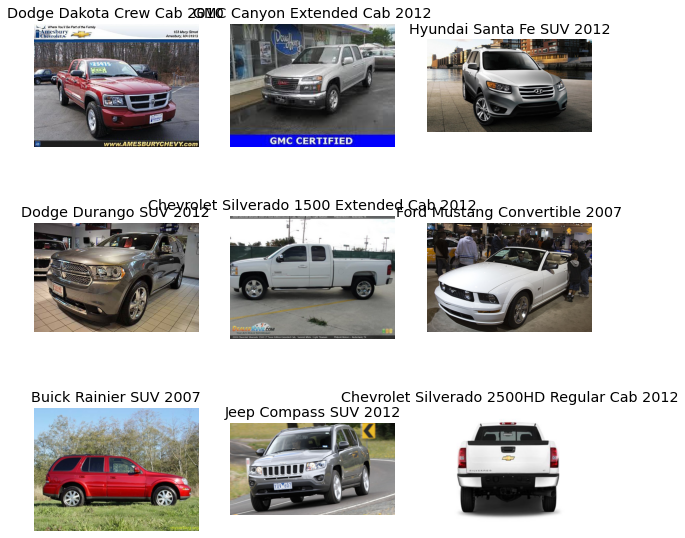

In [26]:
# Plot training images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(train_dir + "/" + train_images[i] + "/" + os.listdir(train_dir + "/" + train_images[i])[0])
    plt.imshow(img)
    plt.title(train_images[i])
    plt.axis("off")

['Audi 100 Wagon 1994', 'Audi TT RS Coupe 2012', 'Audi 100 Sedan 1994', 'Audi R8 Coupe 2012', 'Audi V8 Sedan 1994', 'Audi RS 4 Convertible 2008', 'Audi A5 Coupe 2012', 'Audi TT Hatchback 2011', 'Audi S6 Sedan 2011', 'Audi TTS Coupe 2012', 'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012', 'Audi S4 Sedan 2007', 'Audi S5 Coupe 2012']


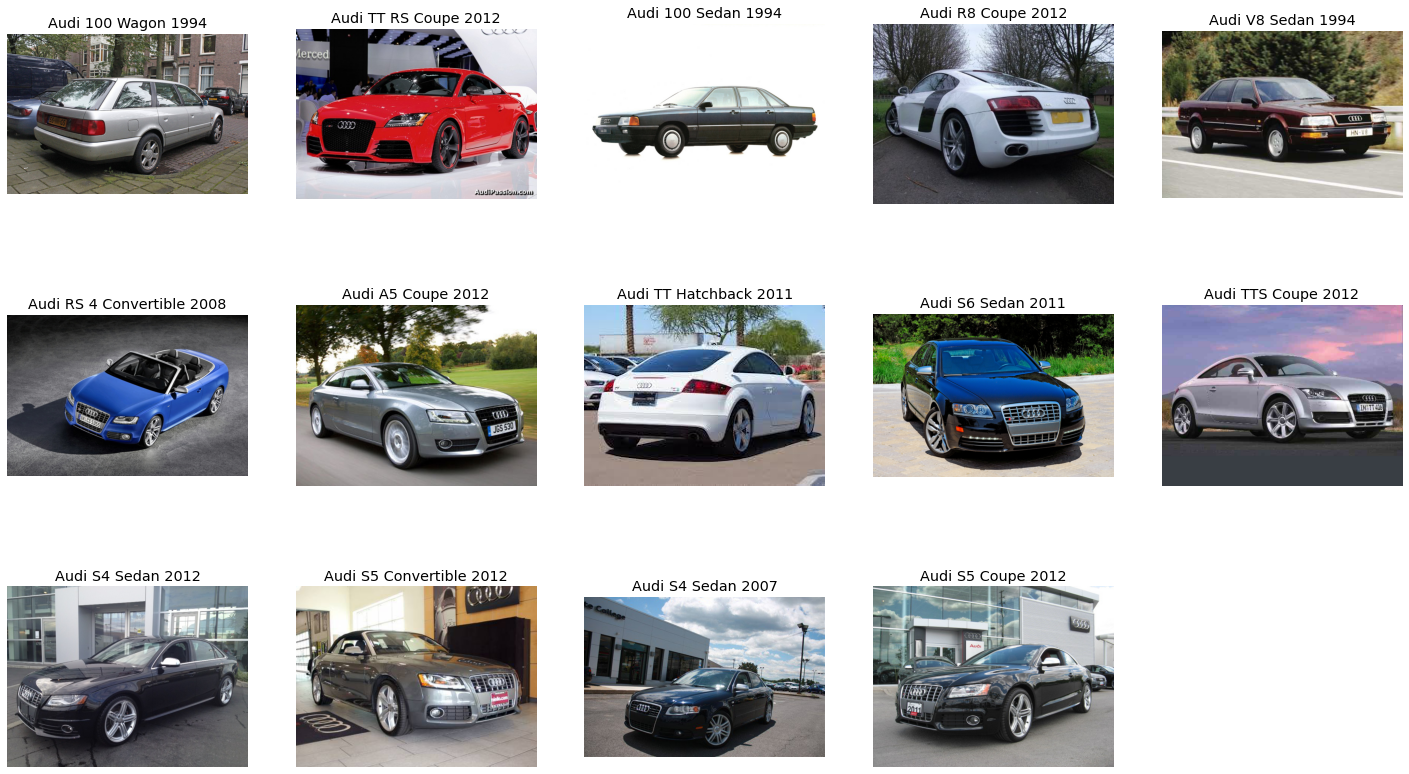

In [56]:
# Show specific brand images
def show_brand_images(brand_name):
    """ Function to find all the models of a 
    given car brand-name and show their images."""
    brand_name = str(brand_name)
    # Find all the models with a given brand name
    car = []
    for i in range(len(train_images)):
        if brand_name in train_images[i].lower():
            # print(train_images[i])
            # car = train_images[i]
            car.append(train_images[i])
    print(car)
    # Show one image from every class
    plt.figure(figsize=(25, 25))
    for i in range(len(car)):
        plt.subplot(5, 5, i+1)
        img = plt.imread(train_dir + "/" + car[i] + "/" + os.listdir(train_dir + "/" + car[i])[0])
        plt.imshow(img)
        plt.title(car[i])
        plt.axis("off")

show_brand_images("audi")

In [ ]:
# To be continued...
# https://debuggercafe.com/stanford-cars-classification-using-efficientnet-pytorch/

In [16]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# Required constants.
TRAIN_DIR = "/Users/dim__gag/Desktop/stanford-cars-dataset/data/car_data/car_data/train"
VALID_DIR = "/Users/dim__gag/Desktop/stanford-cars-dataset/data/car_data/car_data/test"

IMAGE_SIZE = 224 # Image size of resize when applying transforms.
BATCH_SIZE = 32
NUM_WORKERS = 4 # Number of parallel processes for data preparation.

# Training transforms
def get_train_transform(IMAGE_SIZE):
    train_transform = transforms.Compose([
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(35),
        transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),
        transforms.RandomGrayscale(p=0.5),
        transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
        transforms.RandomPosterize(bits=2, p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
    ])
    return train_transform
# Validation transforms
def get_valid_transform(IMAGE_SIZE):
    valid_transform = transforms.Compose([
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
    ])
    return valid_transform

def get_datasets():
    """
    Function to prepare the Datasets.
    Returns the training and validation datasets along 
    with the class names.
    """
    dataset_train = datasets.ImageFolder(
        TRAIN_DIR, 
        transform=(get_train_transform(IMAGE_SIZE))
    )
    dataset_valid = datasets.ImageFolder(
        VALID_DIR, 
        transform=(get_valid_transform(IMAGE_SIZE))
    )
    return dataset_train, dataset_valid, dataset_train.classes
def get_data_loaders(dataset_train, dataset_valid):
    """
    Prepares the training and validation data loaders.
    :param dataset_train: The training dataset.
    :param dataset_valid: The validation dataset.
    Returns the training and validation data loaders.
    """
    train_loader = DataLoader(
        dataset_train, batch_size=BATCH_SIZE, 
        shuffle=True, num_workers=NUM_WORKERS
    )
    valid_loader = DataLoader(
        dataset_valid, batch_size=BATCH_SIZE, 
        shuffle=False, num_workers=NUM_WORKERS
    )
    return train_loader, valid_loader 

In [10]:
# utlis.py
import torch
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

def save_model(epochs, model, optimizer, criterion):
    torch.save({
        'epoch': epochs,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': criterion,
    }, 'model.pth')

def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # Accuracy plots.
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f"../outputs/accuracy.png")
    
    # Loss plots.
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f"../outputs/loss.png")

In [11]:
import torch.nn as nn
from torchvision import models

def build_model(pretrained=True, fine_tune=True, num_classes=10):
    if pretrained:
        print("Loading pre-trained weights")
    else:
        print("Not loading pre-trained weights")
    model = models.efficientnet_b1(pretrained=pretrained)

    if fine_tune:
        print("Fine-tuning the model")
        for param in model.parameters():
            param.requires_grad = True
    elif not fine_tune:
        print("Not fine-tuning the model")
        for param in model.parameters():
            param.requires_grad = False
    
    # Change the Classification Head
    model.classifier[1] = nn.Linear(in_features=1280, out_features=num_classes)
    return model

In [20]:
# train.py
import torch
import argparse
import torch.nn as nn
import torch.optim as optim
import time

from tqdm.auto import tqdm

# from model import build_model
# from datasets import get_datasets, get_data_loaders
# from utils import save_model, save_plots

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Construct the argument parser and parse the arguments.
parser = argparse.ArgumentParser()
parser.add_argument(
    "--epochs", type=int, default=10,
    help="Number of epochs to train the model"
)
parser.add_argument(
    "-lr", "--learning_rate", type=float, dest="learning_rate", default=0.001,
    help="Learning rate for the optimizer for training the model"
)
args = vars(parser.parse_args())
"""
TODO: Remove this block (for now) and add the epoch number and learning rate inside the training funtion.

"""


usage: ipykernel_launcher.py [-h] [--epochs EPOCHS] [-lr LEARNING_RATE]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"bde51eb9-ff93-4a39-8b24-5dfdfb7de18a" --shell=9002 --transport="tcp" --iopub=9004 --f=/Users/dim__gag/Library/Jupyter/runtime/kernel-v2-19628211W9qRF3waC.json


SystemExit: 2

/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [13]:
# Training function - train.py
def train(model, trainloader, optimizer, criterion):
    model.train()
    print('Training')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
        counter += 1
        image, labels = data
        image = image.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        # Forward pass.
        outputs = model(image)
        # Calculate the loss.
        loss = criterion(outputs, labels)
        train_running_loss += loss.item()
        # Calculate the accuracy.
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        # Backpropagation.
        loss.backward()
        # Update the weights.
        optimizer.step()
    
    # Loss and accuracy for the complete epoch.
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc 


# Validation function.
def validate(model, testloader, criterion, class_names):
    model.eval()
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1
            
            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # Forward pass.
            outputs = model(image)
            # Calculate the loss.
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # Calculate the accuracy.
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()
        
    # Loss and accuracy for the complete epoch.
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(testloader.dataset))
    return epoch_loss, epoch_acc

In [21]:
if __name__ == '__main__':
    # Load the training and validation datasets.
    dataset_train, dataset_valid, dataset_classes = get_datasets()
    print(f"[INFO]: Number of training images: {len(dataset_train)}")
    print(f"[INFO]: Number of validation images: {len(dataset_valid)}")
    # Load the training and validation data loaders.
    train_loader, valid_loader = get_data_loaders(dataset_train, dataset_valid)
    # Learning_parameters. 
    lr = args['learning_rate']
    epochs = args['epochs']
    device = ('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Computation device: {device}")
    print(f"Learning rate: {lr}")
    print(f"Epochs to train for: {epochs}\n")
    # Load the model.
    model = build_model(
        pretrained=True,
        fine_tune=True, 
        num_classes=len(dataset_classes)
    ).to(device)
    
    # Total parameters and trainable parameters.
    total_params = sum(p.numel() for p in model.parameters())
    print(f"{total_params:,} total parameters.")
    total_trainable_params = sum(
        p.numel() for p in model.parameters() if p.requires_grad)
    print(f"{total_trainable_params:,} training parameters.")
    # Optimizer.
    optimizer = optim.Adam(model.parameters(), lr=lr)
    # Loss function.
    criterion = nn.CrossEntropyLoss()
    # Lists to keep track of losses and accuracies.
    train_loss, valid_loss = [], []
    train_acc, valid_acc = [], []
    # Start the training.
    for epoch in range(epochs):
        print(f"[INFO]: Epoch {epoch+1} of {epochs}")
        train_epoch_loss, train_epoch_acc = train(model, train_loader, 
                                                optimizer, criterion)
        valid_epoch_loss, valid_epoch_acc = validate(model, valid_loader,  
                                                    criterion, dataset_classes)
        train_loss.append(train_epoch_loss)
        valid_loss.append(valid_epoch_loss)
        train_acc.append(train_epoch_acc)
        valid_acc.append(valid_epoch_acc)
        print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
        print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
        print('-'*50)
        time.sleep(2)
    # Save the trained model weights.
    save_model(epochs, model, optimizer, criterion)
    # Save the loss and accuracy plots.
    save_plots(train_acc, valid_acc, train_loss, valid_loss)
    print('TRAINING COMPLETE')

[INFO]: Number of training images: 8144
[INFO]: Number of validation images: 8041


NameError: name 'args' is not defined